In [1]:
import cv2
import cv2.aruco as aruco
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load image
img = cv2.imread("../hanibouw.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
# Detect aruco markers
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
arucoDict = dictionary = aruco.getPredefinedDictionary(aruco.DICT_4X4_50)
arucoParams = aruco.DetectorParameters()
detector = aruco.ArucoDetector(dictionary, arucoParams)
markerCorners, markerIds, rejectedCandidates = detector.detectMarkers(img)
aruco.drawDetectedMarkers(img,markerCorners)
markerCorners=np.squeeze(markerCorners)
print("done")

done


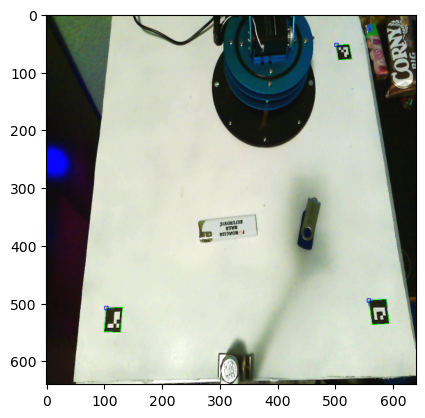

In [4]:
# Show image with aruco markers
plt.imshow(img)

In [5]:
# Find the minimum bounding rectangle
rect = cv2.minAreaRect(markerCorners[0].reshape((-1, 1, 2)))

# Extract the center and other information from the rectangle
center, size, angle = rect

# Print the center coordinates
print("Center coordinates of marker 0 is:", np.round(center))

Center coordinates of marker 0 is: [116. 528.]


In [6]:
markerDetails={}
for i,ida in enumerate(markerIds):
    rect = cv2.minAreaRect(markerCorners[i].reshape((-1, 1, 2)))
    # Extract the center and other information from the rectangle
    center, size, angle = rect
    markerDetails[ida[0]]=np.array([np.round(center),np.round(size)],dtype=np.int16)
markerDetails

{2: array([[116, 528],
        [ 28,  45]], dtype=int16),
 0: array([[516,  65],
        [ 27,  24]], dtype=int16),
 1: array([[576, 515],
        [ 44,  30]], dtype=int16)}

In [7]:
markerCorners[0]

array([[104., 508.],
       [132., 507.],
       [128., 550.],
       [100., 549.]], dtype=float32)

In [8]:
markerIds

array([[2],
       [0],
       [1]], dtype=int32)

In [9]:
markerDetails[0][0]

array([516,  65], dtype=int16)

In [10]:
cv2.line(img, markerDetails[0][0], markerDetails[1][0], (255, 0, 0), thickness=3)
cv2.line(img, markerDetails[1][0],markerDetails[2][0], (0, 255, 0), thickness=3)
cv2.line(img, markerDetails[0][0],markerDetails[2][0], (0, 0, 255), thickness=3)

print("done")

done


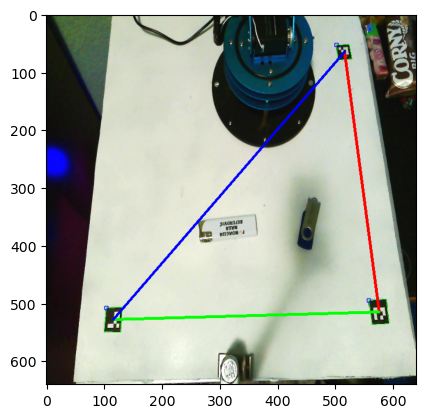

In [11]:
plt.imshow(img)

In [12]:
a=cv2.norm(markerDetails[0][0],markerDetails[1][0])
b=cv2.norm(markerDetails[1][0],markerDetails[2][0])
c=cv2.norm(markerDetails[0][0],markerDetails[2][0])

In [13]:
a,b,c

(453.9823785126467, 460.1836589884521, 611.857009439297)

In [14]:
np.sqrt(a**2+b**2)

646.4278768741336

In [15]:
markerDetails[0][0],markerDetails[1][0],markerDetails[2][0]

(array([516,  65], dtype=int16),
 array([576, 515], dtype=int16),
 array([116, 528], dtype=int16))

# Load predictions

In [16]:
file_name="../hanibouw.txt"
predictions=np.array([])
file = open(file_name).readlines()
for line in file:
        name_class,x1,y1,x2,y2,x3,y3,x4,y4=map(float,line.split())
        x1,y1,x2,y2,x3,y3,x4,y4=[np.round(x*640) for x in [x1,y1,x2,y2,x3,y3,x4,y4]]
        #cordinates=[np.round(np.array([[x1,y1],[x2,y2],[x3,y3],[x4,y4]])*640)]
        predictions=np.append(predictions,[name_class,x1,y1,x2,y2,x3,y3,x4,y4])

predictions=predictions.reshape(-1,9).astype(np.float32)
predictions

array([[  5., 262., 404., 370., 394., 366., 345., 258., 354.],
       [  8., 462., 412., 477., 321., 447., 316., 432., 408.]],
      dtype=float32)

In [17]:
predictions

array([[  5., 262., 404., 370., 394., 366., 345., 258., 354.],
       [  8., 462., 412., 477., 321., 447., 316., 432., 408.]],
      dtype=float32)

In [18]:
predDetails=np.array([])

for pred in predictions:
    center, size, angle = cv2.minAreaRect(pred[1:].reshape(-1,1,2))
    predDetails=np.append(predDetails,[[pred[0],angle],np.round(center),np.round(size)])
predDetails=predDetails.reshape(-1,3,2)

In [19]:
predDetails

array([[[  5.        ,  85.23635101],
        [314.        , 375.        ],
        [ 50.        , 109.        ]],

       [[  8.        ,   9.26022148],
        [455.        , 364.        ],
        [ 30.        ,  93.        ]]])

# Calculate it

In [20]:
#line1=markerDetails[1][0,1]-markerDetails[0][0,1]
#line2=markerDetails[1][0,0]-markerDetails[2][0,0]
line1=a
line2=b
line1,line2

(453.9823785126467, 460.1836589884521)

In [21]:
line1_lenght=315
line2_lenght=330
y_zero=145
x_zero=50

In [22]:
predDetails

array([[[  5.        ,  85.23635101],
        [314.        , 375.        ],
        [ 50.        , 109.        ]],

       [[  8.        ,   9.26022148],
        [455.        , 364.        ],
        [ 30.        ,  93.        ]]])

In [23]:
predDetails[0][1][1]-markerDetails[0][0,1]

310.0

In [24]:
x=(predDetails[0][1][1]-markerDetails[0][0,1])*(line1_lenght/line1)-x_zero
y=(markerDetails[1][0,0]-predDetails[0][1][0])*(line2_lenght/line2)-y_zero
y+=y/10
x,-y

(165.09645444813174, -47.169659259644845)

In [25]:
x=(markerDetails[0][0,1]-markerDetails[0][0,1])*(line1_lenght/line1)-x_zero
y=(markerDetails[1][0,0]-markerDetails[0][0,0])*(line2_lenght/line2)-y_zero
y+=y/10
x,-y

(-50.0, 112.17107039855462)

# Rotation of T5 calculate

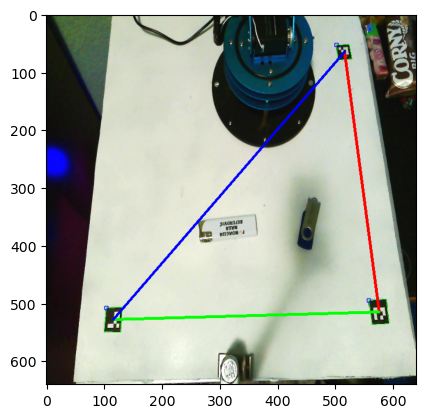

In [26]:
plt.imshow(img)

In [27]:
T1=-34
T5=T1+90 if T1<0 else T1-90
T5

56

In [28]:
(markerDetails[2][0,0]-markerDetails[1][0,0])

-460

In [29]:
305-145

160

In [30]:
markerDetails

{2: array([[116, 528],
        [ 28,  45]], dtype=int16),
 0: array([[516,  65],
        [ 27,  24]], dtype=int16),
 1: array([[576, 515],
        [ 44,  30]], dtype=int16)}

In [30]:
100, -150, -155

(100, -150, -155)

In [31]:
def funct(predictions):
    for pred in predictions:
        yield pred

In [32]:
funct([1,1,12])

<generator object funct at 0x000001F4C77C0CF0>

In [33]:

def square(numbers):
    for n in numbers:
        yield n ** 2

numbers = [1, 2, 3, 4, 5]
squared_numbers = square(numbers)

for squared_number in squared_numbers:
    print(squared_number)



1
4
9
16
25


# Remove aruco markers from images

In [34]:
markerCorners =markerCorners.astype(np.int32)
markerCorners[0]

array([[104, 508],
       [132, 507],
       [128, 550],
       [100, 549]])

In [35]:
markerCorners[0,0,1],markerCorners[0,3,1]

(508, 549)

In [36]:
markerCorners[0,0,0],markerCorners[0,1,0]

(104, 132)

In [37]:
img[np.min(markerCorners[0,:,0]):np.max(markerCorners[0,:,0]),np.min(markerCorners[0,:,1]):np.max(markerCorners[0,:,1])]=np.ones(34*44*3).reshape(34,44,3)*200

ValueError: could not broadcast input array from shape (34,44,3) into shape (32,43,3)

In [ ]:
plt.imshow(img)

In [ ]:
markerCorners[0,:,0]

In [ ]:
np.full((42, 54, 3), [222, 223, 224])